In [2]:
import pandas as pd
import pylab as plt
import matplotlib.colors as colors
import geopandas as gd

%matplotlib inline

# Epidemiology of COVI-19 in US
---

## Problem Setup

### Predictors and response variables:

We consider a set of putative factors, including
number of people over 65, percentage of urban and rural population,
demographics, socio-ecomoinic varaibles for US counties

Note: *fips* is a county identifier
    
Also we have the confirmed counts for COVID over time: 11/27/20,11/28/20...
    
---

+ See questions after some basic script to show data loading and geo-plotting


In [10]:
df=pd.read_csv('../datasets/covid_epidemiology.csv')
df.fips = [str(int(x)).zfill(5) for x in df.fips]
df=df.set_index('fips')

In [11]:
df.head()

,65yrs,minority,black,hispanic,population,perc_65yrs,perc_minority,perc_black,perc_hispanic,poverty,...,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20
fips,,,,,,,,,,,,,,,,,,,,,
01001,8924,13262,11237,1671,55869,0.159731,0.237377,0.201131,0.029909,7587,...,2716,2735,2751,2780,2818,2873,2893,2945,2979,3005
01003,46830,28036,19593,10534,223234,0.209780,0.125590,0.087769,0.047188,21069,...,8603,8733,8820,8890,9051,9163,9341,9501,9626,9728
01005,4861,12552,11906,1117,24686,0.196913,0.508466,0.482298,0.045248,6788,...,1171,1173,1175,1178,1189,1206,1214,1217,1219,1223
01007,3733,5203,4763,623,22394,0.166696,0.232339,0.212691,0.027820,4400,...,1173,1179,1188,1196,1204,1239,1252,1270,1283,1293
01009,10814,2414,978,5582,57826,0.187009,0.041746,0.016913,0.096531,7527,...,2888,2922,2946,2997,3061,3100,3158,3231,3281,3299


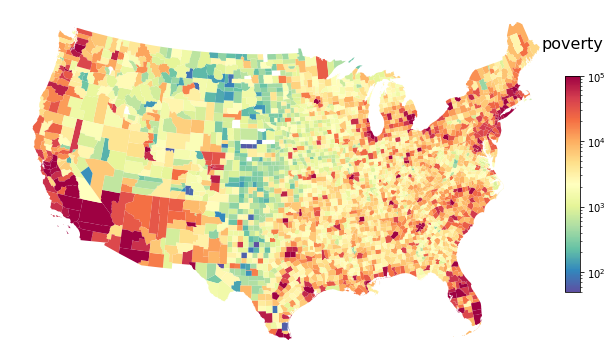

In [40]:
fig = plt.figure(figsize=[10,15])
ax=plt.gca()
variable='poverty'
cbax = fig.add_axes([0.9, 0.4, 0.02, 0.2])   
cbax.set_title(str(variable),fontsize=16,y=1.1)

cax = divider.append_axes("right", size="5%", pad=0.1)
usa = gd.read_file('../datasets/usmap/cb_2018_us_county_5m.shp')
usa.head()
usa['fips']=[x+y for (x,y) in zip(usa.STATEFP.values,usa.COUNTYFP.values)]

usa=usa.set_index('fips')

DF=usa.join(df)
DF = DF[~DF.STATEFP.isin(['02', '15'])]
DF=DF.to_crs('epsg:4326')
DF=DF.to_crs("EPSG:2163")
DF.plot(column=variable,ax=ax,cmap='Spectral_r',norm=colors.LogNorm(vmin=50, vmax=100000), cax=cbax, legend=True)
#ax.set_visible('off');
ax.axis('off');

# Question 1
---

+ Train a decision-tree to predict which counties experience a >5% change in daily count 
+ Train a decision-tree to predict which counties experience a >5% change in weekly count 


# Question 2
---

+ Redo Question 1 using a Bagging classifier. Try to optimize the number of estimators, and depth of tree in each estimator



# Question 2
---

+ How well does the classifier work if you train on the first available couple of days, and then test for later times? Do you need to retrain?

+ Include only past COVID count as predictors and not the other variables and redo the problem. Is it better or worse?

+ Which counties are the best predicted? Which counties are teh worst predicted? Does the predictablity of counties change over time



# Question 3
---

+ Review https://viz.covid19forecasthub.org/ and comment on the type of models used. Do you see any pattern in the diversity of approaches employed?